# Step 1. Import Dependencies 

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.stats import skew
# from utility import check_missing_value 

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline


# Step 2. Import Data

In [2]:
# read data into a DataFrame

df = pd.read_csv('Advertising.csv', index_col=0)
df.head(15)

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
6,8.7,48.9,75.0,7.2
7,57.5,32.8,23.5,11.8
8,120.2,19.6,11.6,13.2
9,8.6,2.1,1.0,4.8
10,199.8,2.6,21.2,10.6


# Step 3. Data Analysis

In [3]:
print(df.dtypes)

TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object


In [4]:
print(df.shape)

(200, 4)


In [5]:
print(df.describe())

               TV       radio   newspaper       sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   14.022500
std     85.854236   14.846809   21.778621    5.217457
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   10.375000
50%    149.750000   22.900000   25.750000   12.900000
75%    218.825000   36.525000   45.100000   17.400000
max    296.400000   49.600000  114.000000   27.000000


# Step 4. Check Assumption

- Linear Regression is A Parametric algorithm means before using Linear Regression we have to check few assumpttions if those assumtions are true then only we can use Linear Regression, other wise use other algo.

## Assumption 1. There should Be No outliers in the Data 

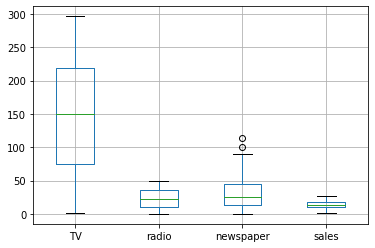

In [6]:
df.boxplot() # we plot boxplot only for continuous numeric data 












in data frame we have all the varaibles in continous numeric values so we
create box plot on all columns by this plot we can se there is no outlier in
tv radio but newspaper contain two outliers 

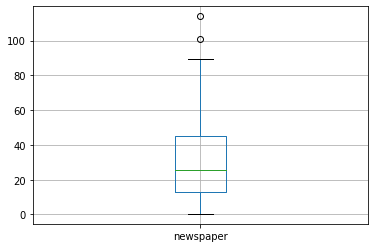

In [7]:
df.boxplot(column="newspaper")

#### Note: If outlier Present then we can treat using below approch
1. Elimination
    1. Directly droping the variable
    
2. Treat the outlier
    1. using Caping and Floaring Approch
    2. Replace Using Measure of Central Tendencies
    3. Replace Custom values
   
3. If cluster is present then leave them as it is 

4. Check with Client if this is acceptable range or not 



In [8]:
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

### Check Missing Data

In [9]:
def check_missing_value(data):
    """
    Objective: Check missing value count and percentage in all columns
    
    data: input data frame 
    return: Missing value data frame 

    """
    total = data.isnull().sum().sort_values(ascending=False)
    percent= (data.isnull().sum()/data.isnull().count()  * 100).sort_values(ascending=False)
    missing_data = pd.concat([total,percent],axis=1,keys=['Total','Percent'])
    return missing_data

In [10]:
miss = check_missing_value(df)
miss

,Total,Percent
sales,0,0.0
newspaper,0,0.0
radio,0,0.0
TV,0,0.0


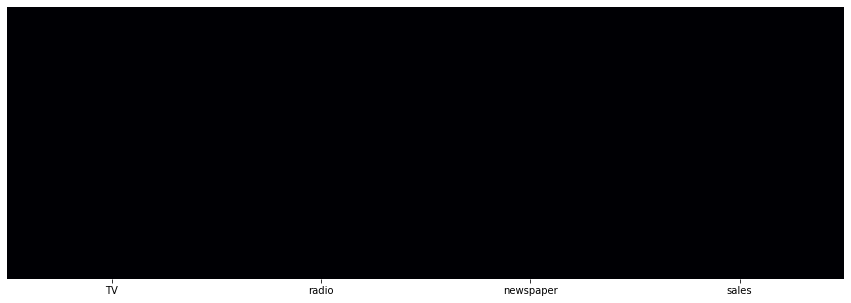

In [11]:

plt.figure(figsize=(15,5))
sns.heatmap(df.isnull(), cbar = False, yticklabels=False, cmap="magma" )

Note:
    
    1. If Missing value contain more than 50% of the data then you can drop the entire column
    2. if less than 50% then we can treat those missing values by using Measure of Central Tendencies
    3. If column is Categorial then you can use Mode to replace missing values
    4. If column is Continuous Numerical Varaiable then you can you use Mean if that variable is not skewd
    5. if column is continuous numerical varaiable with skewd data then we can use Median which is not affected by outlier
    6. You can Predict the missing values by using Other featreus (not recommended)
    7. You can directly ask to client
    8. Common Sence

### Assumption 2. Assumption of Lineartiy: Every Independet Variable should have a Linear Relationship with the Dependent Variable.

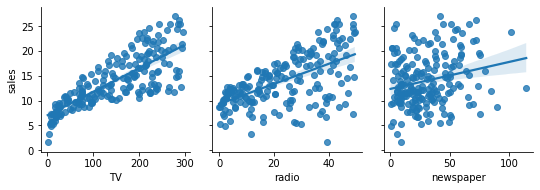

In [12]:
sns.pairplot(df,
             x_vars=["TV","radio","newspaper"],
             y_vars="sales",
             kind='reg')

plt.show()

#### Note: If the assumption of Linearity is not met then we can drop that variable

- Strong Positive Linear Relationship in Tv and sales
- Moderately Strong Positive Linear Relationship in Radio and sales
- NO Relation in Newspaper Sales also the C.I ( Confidence Interval) is also high 



In [13]:
# print all column names
df.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [14]:
feature_cols = ['TV', 'radio', 'newspaper']
X = df[feature_cols]
y = df.sales

In [15]:
X.head()

,TV,radio,newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


In [16]:
y

1      22.1
2      10.4
3       9.3
4      18.5
5      12.9
       ... 
196     7.6
197     9.7
198    12.8
199    25.5
200    13.4
Name: sales, Length: 200, dtype: float64

### Assumption 3: Assumption of Normality: The dependet Variable should follow an approximate normal Distribution

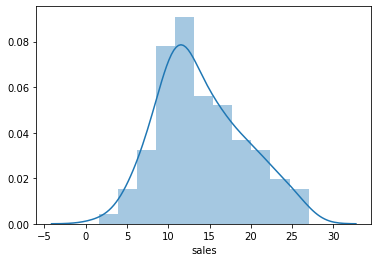

In [17]:
sns.distplot(y, hist=True)
plt.show()

- SALE Variable is meeting the assumption and we can see the approximate normal Distribution


### Note: If its not normal or if its skewed plot then we can transform the column in different transformation

1. Log Transform
    - Most of the time We Prefer log transform, because it will help you to smoothing of curve 
2. SQRT Transform
    - In sqrt transform we can see the peeks and sometime it will not help you to smoothing of curve



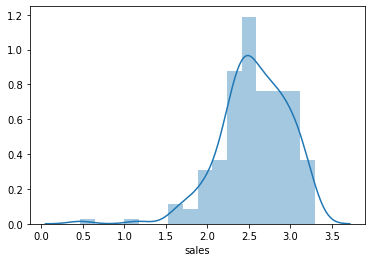

In [18]:
#### you can use this code to convert into log transformation
Y_log = np.log(y)
sns.distplot(Y_log, hist=True)

#### Note: If your data is approximate normal then dont transform coz you will get skewd data

#### Note: For good practive make sure that your X variables does not 
contain high skewness and if its approximately normal then its good.


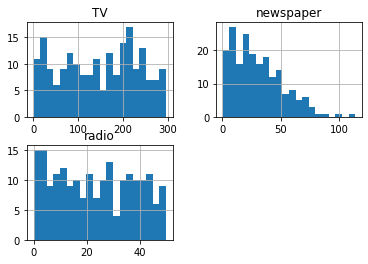

In [19]:
# check hist for all variables
X.hist(bins=20)
plt.show()

In [20]:
data_num_skew = X.apply(lambda x: skew(x.dropna()))
data_num_skewed = data_num_skew[(data_num_skew > 0.75) | (data_num_skew < -0.75)]

print(data_num_skew)
print(data_num_skewed)

TV          -0.069328
radio        0.093467
newspaper    0.887996
dtype: float64
newspaper    0.887996
dtype: float64


In [21]:
# apply log + 1 transformation for all numeric featreus with Skewness over 0.75
X[data_num_skewed.index] = np.log1p(X[data_num_skewed.index])

- Range of skewness is -1 to +1 and value close to 0 means normal distribution

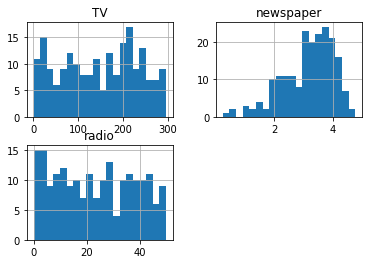

In [22]:
# check hist for all variables after log transform of newspaper 
X.hist(bins=20)
plt.show()

### Assumption 4. There should be No multicolinearity in the Data 

- Multicolinearity is problem where one variable is dependent on other, 
we want dependecy between x and y variable but not in the X variables,
so if X variables are depend on each other then the model will not be good.

- To check the multicolinearity we can use the pearson correlation or VIF value 



#### Pearson Corrlelation

In [23]:
corr_df = X.corr(method="pearson")
print(corr_df)

                 TV     radio  newspaper
TV         1.000000  0.054809   0.030951
radio      0.054809  1.000000   0.251909
newspaper  0.030951  0.251909   1.000000


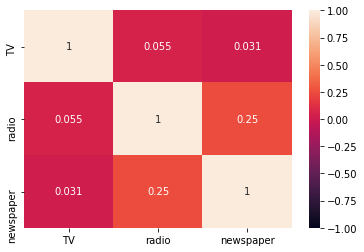

In [24]:
sns.heatmap(corr_df, vmax=1.0, vmin=-1.0, annot=True)
plt.show()

- We want value close to 0 means that is not correlated with each other

#### Note: If the correlation is high between two variables then drop one beacuse both 
variable carrying the similar information so eliminate the varible but think logically.

#### Check VIF

- Sometimes the correlation matrix alone will not help you to check the multicolinearity 
so you can use VIF 

In [25]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

vif_df = pd.DataFrame()
vif_df["features"] = X.columns
vif_df["VIF Factor"] = [vif(X.values, i) for i in range(X.shape[1])]
vif_df.round(2)

,features,VIF Factor
0,TV,3.39
1,radio,3.63
2,newspaper,5.44


- less than 5 value is good in VIF Which represent no multicolinearity


Note: Once you eliminate one variable based on VIF score then other variable's VIF also change and it will decrease so never eliminate all variables at once, so Remove Variables with Highest value and then Run the function again.  Also use domain Knowledge Don’t just depend on VIF Values. 

In [26]:
# df.drop("newspaper", axis=1, inplace=True)
# # Rerun the VIF CODE 

In [27]:
from sklearn.model_selection import train_test_split

# > 1000 --> TEST SIZE = 0.3
# < 1000 --> TEST SIZE = 0.2

#Split the data into test and train
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2,
                                                    random_state=10)  


In [28]:
df.shape

(200, 4)

In [29]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(160, 3)
(160,)
(40, 3)
(40,)


In [30]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(X_train) 

X_train_scale = scaler.transform(X_train)
X_test_scale = scaler.transform(X_test)


In [31]:
X_train

,TV,radio,newspaper
191,39.5,41.1,1.916923
8,120.2,19.6,2.533697
27,142.9,29.3,2.610070
139,43.0,25.9,3.068053
59,210.8,49.6,3.655840
...,...,...,...
114,209.6,20.6,2.459589
65,131.1,42.8,3.397858
16,195.4,47.7,3.987130
126,87.2,11.8,3.292126


In [32]:
X_train_scale

array([[0.12110845, 0.82758621, 0.36910949],
       [0.39719466, 0.39148073, 0.50670344],
       [0.4748546 , 0.58823529, 0.52374121],
       [0.13308245, 0.51926978, 0.62591103],
       [0.70715019, 1.        , 0.75703825],
       [0.07765994, 0.663286  , 0.61309872],
       [0.62880602, 0.34279919, 0.5971572 ],
       [0.78002053, 0.168357  , 0.44835052],
       [0.01094766, 0.56389452, 0.777408  ],
       [0.46219637, 0.28397566, 0.67339682],
       [0.1991105 , 0.2494929 , 0.60182933],
       [0.69380773, 0.1643002 , 0.68000727],
       [1.        , 0.73022312, 0.97301989],
       [0.54533014, 0.74036511, 0.41624968],
       [0.79815258, 0.09736308, 0.65505062],
       [0.16900445, 0.03448276, 0.63505936],
       [0.93328772, 0.98580122, 0.77950272],
       [0.66712282, 0.61460446, 0.76272954],
       [0.44543277, 0.09330629, 0.46173972],
       [0.21484776, 0.23123732, 0.75178892],
       [0.05234348, 0.31845842, 0.64384727],
       [0.75846733, 0.16024341, 0.84536828],
       [0.

In [33]:
from sklearn.linear_model import LinearRegression

# creat a model object 
lm = LinearRegression()

# train the model object
lm.fit(X_train_scale, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [34]:
# intercept
c = 5

# cofifcent 
b1 = 15
b2 = 8
b3 = 2
b4 = 0

# input independent variables 
x1 = 10  # education -> 1,2,3,4,5
x2 = 12  # work exp  -> 1 - 10
x3 = 15 # age       -> 0 - 100
x4 = 100000 # pincode   ->  1.....

In [35]:
# LINEAR REGRESSION EQUATION
# Y =  B0 + B1*X1 + B2*X2 + B3*X3 + B4*X4

In [36]:
y =  c + (b1*x1) + (b2*x2) + (b3*x3) + (b4*x4)
y

281

In [37]:
# print intercept and coefficients
print (lm.intercept_)
print (lm.coef_)

3.5777036762562577
[12.78593321  9.51672799 -0.21942783]


In [38]:
# pair the feature names with the coefficients
print(list(zip(feature_cols, lm.coef_)))

[('TV', 12.785933211080346), ('radio', 9.516727993391218), ('newspaper', -0.21942783008785474)]


In [39]:
# try chaging the value of X 
500
X1=300 # tv
X2=200 # radio
X3=0 # newspaper
y_pred_single_data=3.5963760844147785+(12.78240791 *X1)+(9.5053313 *X2)+(-0.19952401*X3)
print(y_pred_single_data)

5739.385009084415


In [40]:
X_test

,TV,radio,newspaper
60,210.7,29.5,2.332144
6,8.7,48.9,4.330733
21,218.4,27.7,3.996364
199,283.6,42.0,4.207673
53,216.4,41.7,3.703768
20,147.3,23.9,3.000720
163,188.4,18.1,3.280911
56,198.9,49.4,4.110874
70,216.8,43.9,3.339322
3,17.2,45.9,4.252772


In [41]:
y_pred=lm.predict(X_test_scale)
print(y_pred)

[18.15026866 12.96136899 18.05815332 23.66025079 20.68751041 14.26325872
 14.92774472 21.38847375 21.14752911 12.75788534 23.99735583  7.20632737
 12.30777109 19.22813333 19.41581583 13.44985803 19.62619644  9.24667496
 21.1052867  20.87838433 15.52611251 10.91695579 22.82910679 15.82915597
 17.40742204  8.17170435 11.88738387 12.69866637 21.71275044  7.94920205
 12.49118989 20.43292079  4.71443086  4.72126238 16.7504848  15.74384945
  6.74775596 17.73750244  9.01170001 13.60841593]


In [42]:
new_df = pd.DataFrame()
new_df = X_test

new_df["Actual Sales"] = y_test
new_df["Predicted Sales"] = y_pred
new_df

,TV,radio,newspaper,Actual Sales,Predicted Sales
60,210.7,29.5,2.332144,18.4,18.150269
6,8.7,48.9,4.330733,7.2,12.961369
21,218.4,27.7,3.996364,18.0,18.058153
199,283.6,42.0,4.207673,25.5,23.660251
53,216.4,41.7,3.703768,22.6,20.687510
20,147.3,23.9,3.000720,14.6,14.263259
163,188.4,18.1,3.280911,14.9,14.927745
56,198.9,49.4,4.110874,23.7,21.388474
70,216.8,43.9,3.339322,22.3,21.147529
3,17.2,45.9,4.252772,9.3,12.757885


In [44]:
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

r2=r2_score(y_test,y_pred)
print("R Square: ", r2)

adjusted_r_squared = 1 - (1-r2)*(len(y_test)-1)/(len(y_test)-X.shape[1]-1)
print("Adjusted R Square: ", adjusted_r_squared)

rmse=np.sqrt(mean_squared_error(y_test,y_pred))
print("RMSE: ", rmse)


R Square:  0.8348010719035319
Adjusted R Square:  0.8210344945621596
RMSE:  2.5929769110930603


- Rsqure tells you how much variablity you can explaoin in the data with the help of regression equation. you will get value in the range of 0 to 1 so close to 1 means good model and close to 0 means worst model (sometimes you will get value less than 0 also)

In [45]:
print(min(y_test))
print(max(y_test))      

1.6
25.5


In [46]:
new_df["Deviation"] = new_df["Actual Sales"] - new_df["Predicted Sales"]
new_df.to_csv("Advertising_Pred.csv", header=True, index=False)
new_df.head()

,TV,radio,newspaper,Actual Sales,Predicted Sales,Deviation
60,210.7,29.5,2.332144,18.4,18.150269,0.249731
6,8.7,48.9,4.330733,7.2,12.961369,-5.761369
21,218.4,27.7,3.996364,18.0,18.058153,-0.058153
199,283.6,42.0,4.207673,25.5,23.660251,1.839749
53,216.4,41.7,3.703768,22.6,20.687510,1.912490
